## Encoding con map

Interesa cuando las categorías tienen un orden lógico o jerárquico
* Bajo, medio, alto
* Colegio, instituto, bachiller, universidad, carrera, máster, doctorado

Ventaja: no crea columnas extra como el get_dummies, por lo que nos simplica los cálculos en modelado.

Habitualmente se suele emplear en la variable de salida (y) en el modelado.

A mayores mostramos la correlación con df.corr()

In [2]:
# Cargar Dataset iris
import pandas as pd

df = pd.read_csv("../Data/iris.csv")
df.head()

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df["Clase"].value_counts()

Clase
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
# encogind usando .map() de texto a número 1, 2, 3,...
# Ideal para situaciones donde la variable es ordinal, es decir, tiene un orden lógico
# Ejemplo: baja, media, alta

mapeo_clase= {
    "Iris-setosa": 1,
    "Iris_versicolor": 2,
    "Iris-virginica": 3
}

df["Clase"] =df["Clase"].map(mapeo_clase)
df.head()

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


In [8]:
# Matriz de correlación

correlacion = df.corr()
correlacion

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase
Largo Sepalo,1.000000,-0.109369,0.871754,0.817954,0.840970
Ancho Sepalo,-0.109369,1.000000,-0.420516,-0.356544,-0.536251
Largo Petalo,0.871754,-0.420516,1.000000,0.962757,0.980933
Ancho Petalo,0.817954,-0.356544,0.962757,1.000000,0.974207
Clase,0.840970,-0.536251,0.980933,0.974207,1.000000


<Axes: >

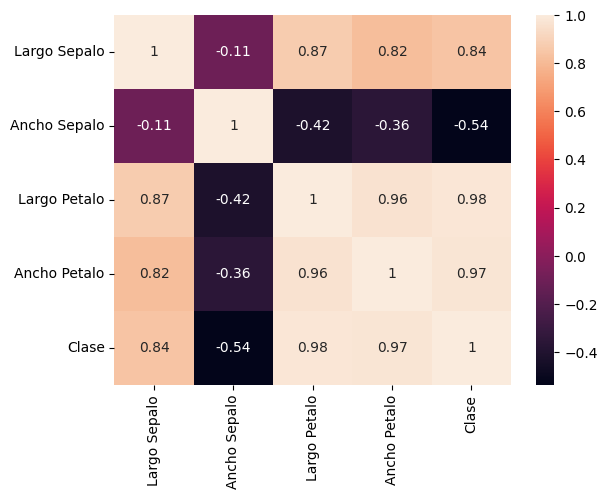

In [9]:
# Mostrar la matriz de correlación con seaborn
import seaborn as sns

sns.heatmap(correlacion, annot=True) # annot=True se pone para que incluya los nombres de las columnas

## Encoding con .get_dummies()
En modelado, entrada X, salida y.

Columnas One=hot. Valores nominales, (no ordinales) Tiene sentido cuando las categorías no tienen un orden intríseco.

Análisis expliratorio de datos EDAs. Entender mejor las correlaciones al tener cada valor separado como una columna independiente. Mayor detalle por categoría para poder analizar las correlaciones.

Habitualmente se suele emplear en la variable de entrada (X) en el modelado.

A mayores mostramos la correlación

In [10]:
df = pd.read_csv("../Data/iris.csv")

In [13]:
pd.get_dummies(df) 

# Genera una columna nueva por cada valor categórico, y cada columna da 0 o 1 

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase_Iris-setosa,Clase_Iris-versicolor,Clase_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [14]:
# Si solo queremos aplicar el encodign a columnas específicas podemos hacerlo así:
df_encoded = pd.get_dummies(df, columns=["Clase"]) 
df_encoded

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase_Iris-setosa,Clase_Iris-versicolor,Clase_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


<Axes: >

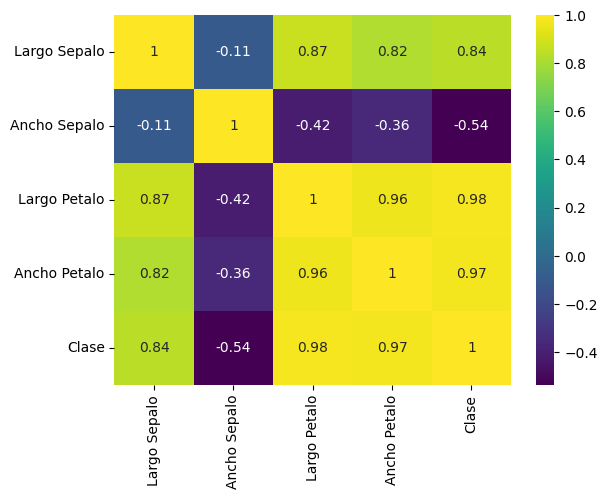

In [16]:
df_encoded.corr()
sns.heatmap(correlacion, annot=True, cmap="viridis")

In [17]:
df.columns

Index(['Largo Sepalo', 'Ancho Sepalo', 'Largo Petalo', 'Ancho Petalo',
       'Clase'],
      dtype='object')

<Axes: >

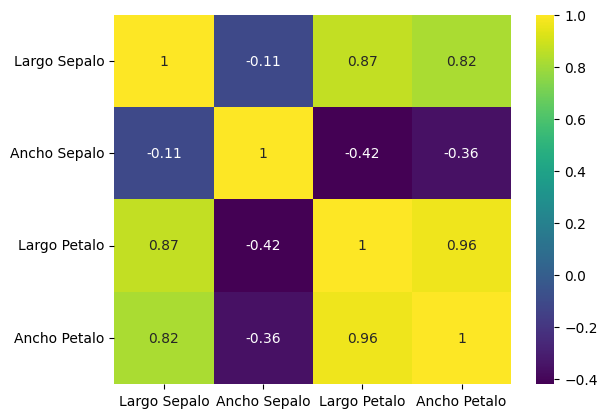

In [19]:
# Para seleccionar las columnas (filtrar columnas) que interesen antes de calcular correlación y mostrarla:
sns.heatmap(df[["Largo Sepalo", "Ancho Sepalo", "Largo Petalo", "Ancho Petalo"]].corr(), annot=True, cmap="viridis")